# Python Pandas
## GroupBy, Pivot Tables and Reshape

* 1 - Group by: Split-Apply-Combine
  * 1.1 - Spliting object into a group
  * 1.2 - Single Index
     * 1.2.1 - Apply functions
       * 1.2.1.1 - Single function
       * 1.2.1.2 - Select the variable
       * 1.2.1.3 - Apply multiple functions
  * 1.3 - Multiple Index
    * 1.3.1 - Splitting into groups
    * 1.3.2 - Apply functions
      * 1.3.2.1 - Single function
      * 1.3.2.2 - Multiple functions
      * 1.3.2.3 - Select variables
* 2 - Reshape and Pivot Tables
  * 2.1 - Reshape
    * 2.1.1 - Pivot
    * 2.1.2 - Unstack and Stack
      * 2.1.2.1 - Unstack
      * 2.1.2.2 - Instack(0)
      * 2.1.2.3 - Stack
    * 2.1.3 - Melt
  * 2.2 - Pivot Table

[Official Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

In [1]:
import pandas as pd
import numpy as np

# 1 - Group by: Split-Apply-Combine
Group by involves at least one of the following steps:
 * **Splitting** data into groups
 * **Apply** a function
 * **Combine** results
 
 
A generic equivalent in SQL:
 ```sql
SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2
```

In [2]:
Countries = pd.read_excel('Countries.xlsx', 
                          sheet_name = 'Sheet1')
Countries

,Country,European_Region,GDPperCapita(PPP),Population_Millions
0,Portugal,Southern,33.4,10.3
1,Poland,Eastern,33.5,38.4
2,Germany,Western,55.0,82.9
3,United Kingdom,Northern,47.0,66.4
4,France,Western,47.1,67.3
5,Spain,Southern,42.1,46.8
6,Italy,Southern,40.7,60.5
7,Belgium,Western,49.7,11.5
8,Norway,Northern,76.6,5.4
9,Switzerland,Western,66.8,8.6


## 1.1 - Spliting object into a group

## 1.2 - Single Index

Splitting an object to provide a mapping of labels to group names. By default `Groupby` will do automatic sorting of the indexed axis.

In [3]:
group = Countries.groupby(['European_Region'])
group.groups

{'Eastern': Int64Index([1, 10], dtype='int64'),
 'Northern': Int64Index([3, 8], dtype='int64'),
 'Southern': Int64Index([0, 5, 6], dtype='int64'),
 'Western': Int64Index([2, 4, 7, 9], dtype='int64')}

### 1.2.1 -  Apply functions

Some of the functions one can use:

|Function  | Description           |
|----------|-----------------------|
|mean()    | compute mean          |
|sum()     | compute sum           |
|sum()     | compute sum           |
|count()   | compute count         |
|std()     | standard deviation    |
|var()     | variance              |
|sem()     | standard error of mean|
|describe()| descriptive statistics|
|min()     | compute min           |
|max()     | compute max           |


#### 1.2.1.1 - Single Function

##### What is the total amount of GDP *per Capita* and Population for the above `Countries` data set for each European region?

In [4]:
Countries.groupby(['European_Region']).sum()

,GDPperCapita(PPP),Population_Millions
European_Region,,
Eastern,52.3,48.3
Northern,123.6,71.8
Southern,116.2,117.6
Western,218.6,170.3


In [5]:
Countries.groupby(['European_Region']).describe()

GDPperCapita(PPP)                                             \
                            count       mean        std   min     25%    50%   
European_Region                                                                
Eastern                       2.0  26.150000  10.394470  18.8  22.475  26.15   
Northern                      2.0  61.800000  20.930361  47.0  54.400  61.80   
Southern                      3.0  38.733333   4.671545  33.4  37.050  40.70   
Western                       4.0  54.650000   8.741663  47.1  49.050  52.35   

                              Population_Millions                           \
                    75%   max               count    mean        std   min   
European_Region                                                              
Eastern          29.825  33.5                 2.0  24.150  20.152543   9.9   
Northern         69.200  76.6                 2.0  35.900  43.133514   5.4   
Southern         41.400  42.1                 3.0  39.200  25.948603  10.3   
Western          57.950  66.8                 4.0  42.575  38.111186   8.6   

                                              
                    25%    50%     75%   max  
European_Region                               
Eastern          17.025  24.15  31.275  38.4  
Northern         20.650  35.90  51.150  66.4  
Southern         28.550  46.80  53.650  60.5  
Western          10.775  39.40  71.200  82.9

#### 1.2.1.2 -  Select the variable

##### What is the average GDP *per Capita* for the different European regions? 

In [6]:
Countries.groupby(['European_Region'])[['GDPperCapita(PPP)']].mean()

,GDPperCapita(PPP)
European_Region,
Eastern,26.150000
Northern,61.800000
Southern,38.733333
Western,54.650000


##### What is the mean  GDP *per Capita* and Population for the Western European Countries in the dataset?

In [7]:
Countries[Countries['European_Region']=='Western'].groupby(['European_Region']).mean()

,GDPperCapita(PPP),Population_Millions
European_Region,,
Western,54.65,42.575


#### 1.2.1.3 -  Apply functions multiple functions at once

####  Apply the same set of functions to all the columns

In [8]:
# Both alternatives provide the same output 
# Countries.groupby(['European_Region']).agg([np.sum, np.mean, np.std, np.var]) ## requires numpy package to run
Countries.groupby(['European_Region']).agg(['sum', 'mean', 'std', 'var']) ## does not requires numpy package to run

GDPperCapita(PPP)                                    \
                              sum       mean        std         var   
European_Region                                                       
Eastern                      52.3  26.150000  10.394470  108.045000   
Northern                    123.6  61.800000  20.930361  438.080000   
Southern                    116.2  38.733333   4.671545   21.823333   
Western                     218.6  54.650000   8.741663   76.416667   

                Population_Millions                                
                                sum    mean        std        var  
European_Region                                                    
Eastern                        48.3  24.150  20.152543   406.1250  
Northern                       71.8  35.900  43.133514  1860.5000  
Southern                      117.6  39.200  25.948603   673.3300  
Western                       170.3  42.575  38.111186  1452.4625

#### Apply different set of functions to the different columns

In [9]:
Countries.groupby(['European_Region']).agg({'GDPperCapita(PPP)': ['sum', 'mean'],
                                            'Population_Millions' : ['std']})

GDPperCapita(PPP)            Population_Millions
                              sum       mean                 std
European_Region                                                 
Eastern                      52.3  26.150000           20.152543
Northern                    123.6  61.800000           43.133514
Southern                    116.2  38.733333           25.948603
Western                     218.6  54.650000           38.111186

## 1.3 - Multi Index

Import payable and receivables dataframe

In [10]:
PayRec = pd.read_csv('PayRec.csv')
PayRec

,Funds,PayRec,Open Value,Close Value
0,Fund A,Receivables,518,552
1,Fund B,Payables,-220,-407
2,Fund B,Receivables,676,386
3,Fund D,Payables,-402,-570
4,Fund C,Receivables,338,556
5,Fund D,Receivables,398,424
6,Fund C,Payables,-753,-479
7,Fund A,Payables,-631,-635
8,Fund D,Payables,-677,-586
9,Fund C,Receivables,586,449


In [11]:
PayRec.sort_values(by=['Funds', 'PayRec'])

,Funds,PayRec,Open Value,Close Value
7,Fund A,Payables,-631,-635
0,Fund A,Receivables,518,552
1,Fund B,Payables,-220,-407
2,Fund B,Receivables,676,386
10,Fund B,Receivables,336,617
6,Fund C,Payables,-753,-479
4,Fund C,Receivables,338,556
9,Fund C,Receivables,586,449
3,Fund D,Payables,-402,-570
8,Fund D,Payables,-677,-586


### 1.3.1 - Splitting into groups
##### Apply a multi index such that for each fund it will be splitted by Funds and Payable and Receivables (Pay/Rec).

In [12]:
groupm = PayRec.groupby(['Funds', 'PayRec'])
groupm.groups

{('Fund A', 'Payables'): Int64Index([7], dtype='int64'),
 ('Fund A', 'Receivables'): Int64Index([0], dtype='int64'),
 ('Fund B', 'Payables'): Int64Index([1], dtype='int64'),
 ('Fund B', 'Receivables'): Int64Index([2, 10], dtype='int64'),
 ('Fund C', 'Payables'): Int64Index([6], dtype='int64'),
 ('Fund C', 'Receivables'): Int64Index([4, 9], dtype='int64'),
 ('Fund D', 'Payables'): Int64Index([3, 8], dtype='int64'),
 ('Fund D', 'Receivables'): Int64Index([5], dtype='int64')}

### 1.3.2 - Apply Functions
#### 1.3.2.1 - Single Function

In [13]:
PayRec.groupby(['Funds', 'PayRec']).sum().T

Funds         Fund A               Fund B               Fund C              \
PayRec      Payables Receivables Payables Receivables Payables Receivables   
Open Value      -631         518     -220        1012     -753         924   
Close Value     -635         552     -407        1003     -479        1005   

Funds         Fund D              
PayRec      Payables Receivables  
Open Value     -1079         398  
Close Value    -1156         424

**Bonus** - Remove Index

In [14]:
PayRec.groupby(['Funds', 'PayRec']).sum().reset_index()

,Funds,PayRec,Open Value,Close Value
0,Fund A,Payables,-631,-635
1,Fund A,Receivables,518,552
2,Fund B,Payables,-220,-407
3,Fund B,Receivables,1012,1003
4,Fund C,Payables,-753,-479
5,Fund C,Receivables,924,1005
6,Fund D,Payables,-1079,-1156
7,Fund D,Receivables,398,424


#### 1.3.2.2 - Multiple Functions

In [15]:
PayRec.groupby(['Funds', 'PayRec']).agg(['sum', 'mean', 'count'])

Open Value              Close Value             
                          sum   mean count         sum   mean count
Funds  PayRec                                                      
Fund A Payables          -631 -631.0     1        -635 -635.0     1
       Receivables        518  518.0     1         552  552.0     1
Fund B Payables          -220 -220.0     1        -407 -407.0     1
       Receivables       1012  506.0     2        1003  501.5     2
Fund C Payables          -753 -753.0     1        -479 -479.0     1
       Receivables        924  462.0     2        1005  502.5     2
Fund D Payables         -1079 -539.5     2       -1156 -578.0     2
       Receivables        398  398.0     1         424  424.0     1

#### 1.3.2.3 - Select variables

##### What are the Payables and the receivable for funds A and C

In [16]:
PayRec[PayRec['Funds'].isin(['Fund A', 'Fund C'])].groupby(['Funds', 'PayRec']).sum()

Open Value  Close Value
Funds  PayRec                              
Fund A Payables           -631         -635
       Receivables         518          552
Fund C Payables           -753         -479
       Receivables         924         1005

##### What are the net payables/ receivables for each fund when market opens?

In [17]:
PayRec.groupby(['Funds'])[['Open Value']].sum()

,Open Value
Funds,
Fund A,-113
Fund B,792
Fund C,171
Fund D,-681


##### What is the total Receivable amount for fund A?

In [18]:
PayRec[(PayRec['Funds']=='Fund C') & (PayRec['PayRec']=='Receivables')].groupby(['Funds', 'PayRec']).sum()

,,Open Value,Close Value
Funds,PayRec,,
Fund C,Receivables,924,1005


# 2 - Reshap and Pivot Tables
## 2.1 - Reshape
### 2.1.1 - Pivot

Create a pivot style view of data where by columns and index can be specified from data. Payables and receivables will be used as reference data. Before running pivot, data must be aggredated (in this case with `groupby` function) to remove duplicated entries.

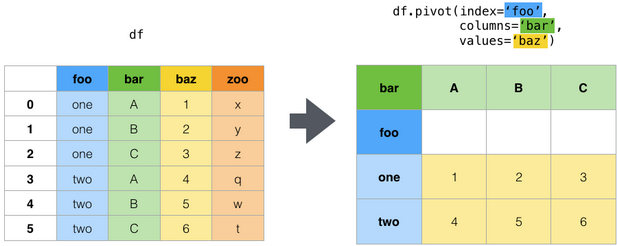

In [19]:
PRgrouped = PayRec.groupby(['Funds', 'PayRec']).sum().reset_index()
PRgrouped.head()

,Funds,PayRec,Open Value,Close Value
0,Fund A,Payables,-631,-635
1,Fund A,Receivables,518,552
2,Fund B,Payables,-220,-407
3,Fund B,Receivables,1012,1003
4,Fund C,Payables,-753,-479


##### Put in a `pivot` form values for the `Open Prices`?

In [20]:
# PRgrouped.pivot(index = 'Funds', columns = 'PayRec')['Open Value']
PRgrouped.pivot(index = 'Funds', columns = 'PayRec', values = 'Open Value')

PayRec,Payables,Receivables
Funds,,
Fund A,-631,518
Fund B,-220,1012
Fund C,-753,924
Fund D,-1079,398


##### What is the `pivot` form values for both the `Open Value` and `Close Value`?

In [21]:
PRgrouped.pivot(index = 'Funds', columns = 'PayRec')

Open Value             Close Value            
PayRec   Payables Receivables    Payables Receivables
Funds                                                
Fund A       -631         518        -635         552
Fund B       -220        1012        -407        1003
Fund C       -753         924        -479        1005
Fund D      -1079         398       -1156         424

#### `Pivot` functions limitations. ValueERROR

Please note that the original data frame i.e. `PayRec` will output an error. Looking below as example `Receivables` for `Fund B` is repited twice.

In [22]:
PayRec.groupby(['Funds', 'PayRec']).groups

{('Fund A', 'Payables'): Int64Index([7], dtype='int64'),
 ('Fund A', 'Receivables'): Int64Index([0], dtype='int64'),
 ('Fund B', 'Payables'): Int64Index([1], dtype='int64'),
 ('Fund B', 'Receivables'): Int64Index([2, 10], dtype='int64'),
 ('Fund C', 'Payables'): Int64Index([6], dtype='int64'),
 ('Fund C', 'Receivables'): Int64Index([4, 9], dtype='int64'),
 ('Fund D', 'Payables'): Int64Index([3, 8], dtype='int64'),
 ('Fund D', 'Receivables'): Int64Index([5], dtype='int64')}

In [37]:
PayRec.pivot(index = 'Funds', columns = 'PayRec', values = 'Open Value')

ValueError: Index contains duplicate entries, cannot reshape

#### Solve for above error

One alternative to solve for the above error is to apply a `groupby()` function to the original data set for the `Funds` and `PayRec` columns. See steps at the begining of this section "**2.1.1 - Pivot**".

### 2.1.2 - Stack and Unstack

Closely related to the `pivot` designed to work together with `multiindexing`.

#### 2.1.2.1 - Unstack

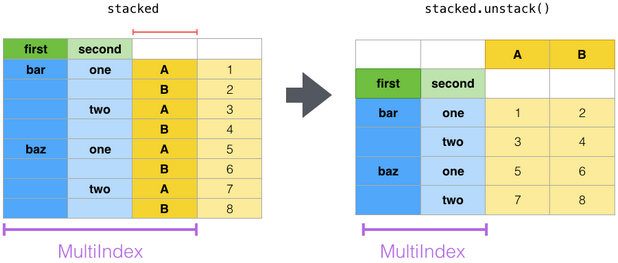

In [23]:
group = PayRec.groupby(['Funds', 'PayRec']).sum()
group

Open Value  Close Value
Funds  PayRec                              
Fund A Payables           -631         -635
       Receivables         518          552
Fund B Payables           -220         -407
       Receivables        1012         1003
Fund C Payables           -753         -479
       Receivables         924         1005
Fund D Payables          -1079        -1156
       Receivables         398          424

In [24]:
unstack = group.unstack()['Open Value']
unstack

PayRec,Payables,Receivables
Funds,,
Fund A,-631,518
Fund B,-220,1012
Fund C,-753,924
Fund D,-1079,398


#### 2.1.2.2 - Unstacked(0)
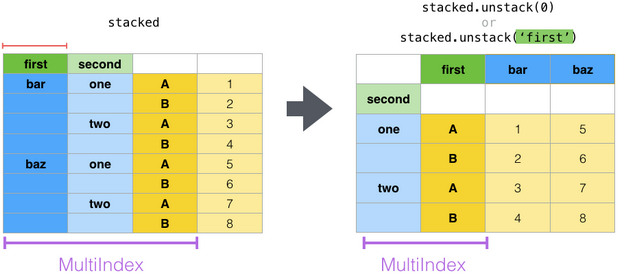

In [25]:
group.unstack(0)['Open Value']

Funds,Fund A,Fund B,Fund C,Fund D
PayRec,,,,
Payables,-631,-220,-753,-1079
Receivables,518,1012,924,398


#### 2.1.2.3 - Stack

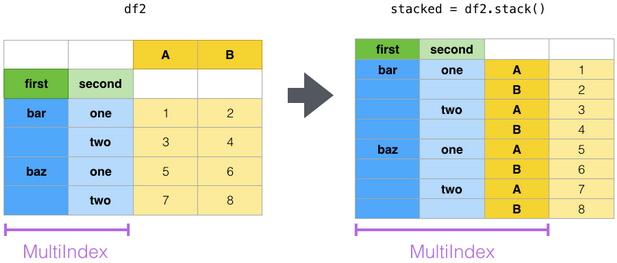

In [26]:
unstack

PayRec,Payables,Receivables
Funds,,
Fund A,-631,518
Fund B,-220,1012
Fund C,-753,924
Fund D,-1079,398


In [27]:
pd.DataFrame(unstack.stack())

0
Funds  PayRec           
Fund A Payables     -631
       Receivables   518
Fund B Payables     -220
       Receivables  1012
Fund C Payables     -753
       Receivables   924
Fund D Payables    -1079
       Receivables   398

In [28]:
unstack2 = PRgrouped.pivot(index = 'Funds', columns = 'PayRec')
unstack2

Open Value             Close Value            
PayRec   Payables Receivables    Payables Receivables
Funds                                                
Fund A       -631         518        -635         552
Fund B       -220        1012        -407        1003
Fund C       -753         924        -479        1005
Fund D      -1079         398       -1156         424

In [29]:
unstack2.stack()

Open Value  Close Value
Funds  PayRec                              
Fund A Payables           -631         -635
       Receivables         518          552
Fund B Payables           -220         -407
       Receivables        1012         1003
Fund C Payables           -753         -479
       Receivables         924         1005
Fund D Payables          -1079        -1156
       Receivables         398          424

In [30]:
Stack2 = pd.DataFrame(unstack2.stack().stack())
Stack2

0
Funds  PayRec                       
Fund A Payables    Open Value   -631
                   Close Value  -635
       Receivables Open Value    518
                   Close Value   552
Fund B Payables    Open Value   -220
                   Close Value  -407
       Receivables Open Value   1012
                   Close Value  1003
Fund C Payables    Open Value   -753
                   Close Value  -479
       Receivables Open Value    924
                   Close Value  1005
Fund D Payables    Open Value  -1079
                   Close Value -1156
       Receivables Open Value    398
                   Close Value   424

### 2.1.3 - Melt

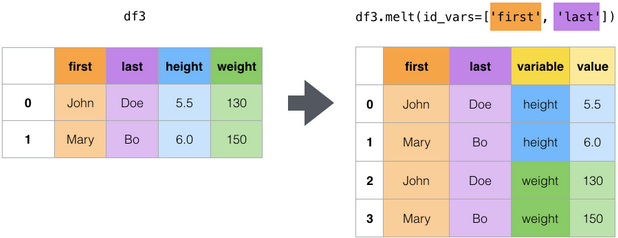

In [31]:
melt = unstack2.stack().reset_index()
melt

,Funds,PayRec,Open Value,Close Value
0,Fund A,Payables,-631,-635
1,Fund A,Receivables,518,552
2,Fund B,Payables,-220,-407
3,Fund B,Receivables,1012,1003
4,Fund C,Payables,-753,-479
5,Fund C,Receivables,924,1005
6,Fund D,Payables,-1079,-1156
7,Fund D,Receivables,398,424


In [32]:
melt.melt(id_vars=['Funds', 'PayRec'])

,Funds,PayRec,variable,value
0,Fund A,Payables,Open Value,-631
1,Fund A,Receivables,Open Value,518
2,Fund B,Payables,Open Value,-220
3,Fund B,Receivables,Open Value,1012
4,Fund C,Payables,Open Value,-753
5,Fund C,Receivables,Open Value,924
6,Fund D,Payables,Open Value,-1079
7,Fund D,Receivables,Open Value,398
8,Fund A,Payables,Close Value,-635
9,Fund A,Receivables,Close Value,552


### 2.1.3 - Pivot Table

Start from the `PayRec` data frame. Unlike the `Pivot` formula the `pivot_table` can work with duplicated values, example see below that Fund B Receivables has two lines. `pivot_table`, can therefor aghregate values in a way the `pivot` fanction can't.

In [33]:
PayRec.sort_values(by=['Funds', 'PayRec'])

,Funds,PayRec,Open Value,Close Value
7,Fund A,Payables,-631,-635
0,Fund A,Receivables,518,552
1,Fund B,Payables,-220,-407
2,Fund B,Receivables,676,386
10,Fund B,Receivables,336,617
6,Fund C,Payables,-753,-479
4,Fund C,Receivables,338,556
9,Fund C,Receivables,586,449
3,Fund D,Payables,-402,-570
8,Fund D,Payables,-677,-586


By default `pivot_table` averages the values.

In [34]:
PayRec.pivot_table(index = 'Funds', columns = 'PayRec')

Close Value             Open Value            
PayRec    Payables Receivables   Payables Receivables
Funds                                                
Fund A      -635.0       552.0     -631.0       518.0
Fund B      -407.0       501.5     -220.0       506.0
Fund C      -479.0       502.5     -753.0       462.0
Fund D      -578.0       424.0     -539.5       398.0

In this case the goal is to have the sum and not the average.

What if I want the sum?

In [35]:
PayRec.pivot_table(index = 'Funds', columns = 'PayRec', aggfunc = 'sum')

Close Value             Open Value            
PayRec    Payables Receivables   Payables Receivables
Funds                                                
Fund A        -635         552       -631         518
Fund B        -407        1003       -220        1012
Fund C        -479        1005       -753         924
Fund D       -1156         424      -1079         398

In [36]:
PayRec.pivot_table(index = 'Funds', columns = 'PayRec', aggfunc = 'count')

Close Value             Open Value            
PayRec    Payables Receivables   Payables Receivables
Funds                                                
Fund A           1           1          1           1
Fund B           1           2          1           2
Fund C           1           2          1           2
Fund D           2           1          2           1